# SVM Classifier on agriculture dataset
### Aniket Singh   1MS17CS011
### Zaifa Khan       1MS17CS143
### Sathvik B         1MS17CS148


#### STEP 1: import necessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

#### STEP 2: Read the data in the csv file into a pandas dataframe

In [2]:
data = pd.read_csv("new_dataset5.csv")
# data = data

#### Step 3: Get the information about the database, i.e, the number of attributes, the number of values, and the datatype of the attributes

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
Crop           1500 non-null object
Temperature    1500 non-null int64
Rainfall       1500 non-null int64
Humidity       1500 non-null int64
dtypes: int64(3), object(1)
memory usage: 47.0+ KB


#### Step 4: Find the number of null values in the dataframe, per attribute

In [4]:
data.isnull().sum()

Crop           0
Temperature    0
Rainfall       0
Humidity       0
dtype: int64

#### Step 5: Print sample values of the dataframe

In [5]:
print(data)

           Crop  Temperature  Rainfall  Humidity
0         Wheat           34        75        68
1         Wheat           34        75        71
2         Wheat           34        67        71
3     Field Pea           33        58        74
4         Wheat           35        86        68
...         ...          ...       ...       ...
1495       Gram           35        44        67
1496      Wheat           33        68        65
1497  Field Pea           34        57        71
1498  Field Pea           32        58        71
1499  Field Pea           35        44        75

[1500 rows x 4 columns]


In [6]:
data.head()

,Crop,Temperature,Rainfall,Humidity
0,Wheat,34,75,68
1,Wheat,34,75,71
2,Wheat,34,67,71
3,Field Pea,33,58,74
4,Wheat,35,86,68


#### Step 6: Separate the attributes and save it as X, separate the target values and save it as y

In [7]:
X = data[['Temperature', 'Rainfall' , 'Humidity']]
y = data.Crop 

#### Step 7: Plot a box plot to find outliers, if any

{'whiskers': [<matplotlib.lines.Line2D at 0x235e0d36888>,
 'caps': [<matplotlib.lines.Line2D at 0x235e0d41988>,
 'boxes': [<matplotlib.lines.Line2D at 0x235e0d1c388>,
 'medians': [<matplotlib.lines.Line2D at 0x235e0d45a88>,
 'fliers': [<matplotlib.lines.Line2D at 0x235e0d45b88>,
 'means': []}

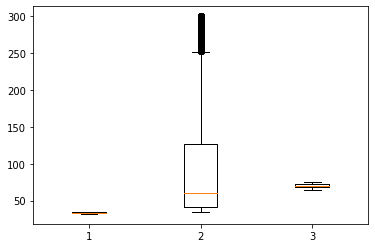

In [8]:
import matplotlib.pyplot as plt
plt.boxplot([data['Temperature'], data['Rainfall'], data['Humidity']])


#### Step 8: Analysing the effect of the data variables

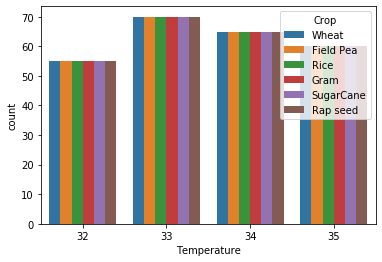

In [9]:
import seaborn as sns
sns.countplot(x='Temperature', hue='Crop', data=data)

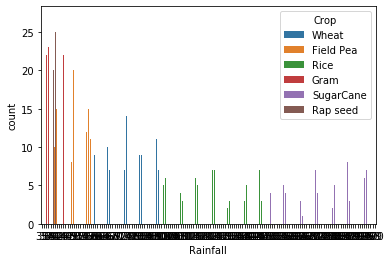

In [10]:
sns.countplot(x='Rainfall', hue='Crop', data=data)

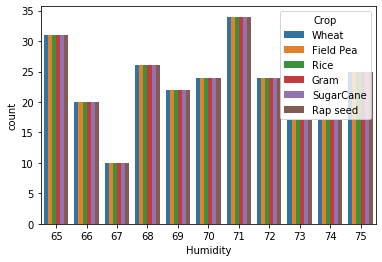

In [11]:
sns.countplot(x='Humidity', hue='Crop', data=data)

#### Step 9: Get the correlation matrix and the correlation plot

In [12]:
df_for_correlation = pd.DataFrame(X)
df_for_correlation.columns = ['Temperature', 'Rainfall', 'Humidity']
corr_matrix = df_for_correlation.corr()
corr_matrix

,Temperature,Rainfall,Humidity
Temperature,1.000000,-0.007428,-0.084657
Rainfall,-0.007428,1.000000,-0.004254
Humidity,-0.084657,-0.004254,1.000000


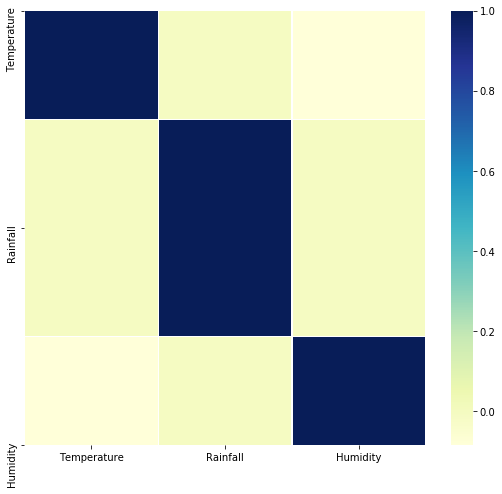

In [13]:
fig, ax = plt.subplots(figsize = (9, 8))
sns.heatmap(corr_matrix, ax=ax, cmap='YlGnBu', linewidths=0.1)

#### Step 10: Split the dataset into training and testing datasets

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

#### Step 11: Call the Support Vector Machine SVC Classifier and fit it to the training data

In [15]:
clf_SVM = svm.SVC(kernel = 'rbf')
clf_SVM.fit(X_train, y_train)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Step 12: Test the classifier on both the testing data, as well as the training data

In [16]:
test_SVM = clf_SVM.predict(X_test)
train_SVM = clf_SVM.predict(X_train)

### Accuracy on testing data

In [17]:
np.mean(test_SVM == y_test)

0.7866666666666666

### Accuracy on training data

In [18]:
np.mean(train_SVM == y_train)

0.8504761904761905

## Grid Search

In [19]:
model = svm.SVC();
C = [0.1, 1, 10]
#kernel =['linear', 'poly', 'rbf']
gamma = [0.1, 1, 10]
degree = [1,2,5]

In [20]:
grid = GridSearchCV(estimator = model, cv=3, param_grid=dict(gamma=gamma,degree=degree,C=C) )

In [21]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 5],
                         'gamma': [0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print(grid.best_score_)

0.7628571428571429


In [23]:
print(grid.best_params_)

{'C': 1, 'degree': 1, 'gamma': 0.1}


In [24]:
clf_SVM_final = svm.SVC(kernel = 'rbf', random_state = 42, gamma = 0.1, C = 10.0,degree=1)
clf_SVM_final.fit(X_train, y_train)
test_SVM = clf_SVM.predict(X_test)
train_SVM = clf_SVM.predict(X_train)
print(np.mean(train_SVM == y_train))
print(np.mean(test_SVM == y_test))

0.8504761904761905
0.7866666666666666
